# Dissertation

### Imports

In [958]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import predictionModels as pm
import dFandLB as dflb
import dataClean as dc

### Reading the data

In [959]:
downtime_data = pd.read_excel('Raw Data/Equipment downtime data (202308).xlsx')
downtime_data.to_csv('Raw Data/Equipment downtime data (202308).csv', index=False)

hierarchy_data = pd.read_excel('Raw Data/Operation level of equipment.xlsx')
hierarchy_data.to_csv('Raw Data/Operation level of equipment.csv', index=False)

downtimeNew = pd.read_excel('Raw Data/Equipment downtime data (202310).xlsx')
downtimeNew.to_csv('Raw Data/Equipment downtime data (202310).csv', index=False)

### Clean Data

In [960]:
pattern_data, pattern_new = dc.cleanData(downtime_data, downtimeNew)

/Users/svetozarmiloshevski/Man/BSc. Artificial Intelligence Year 3/Dissertation Git/ISIS-dissertation/dataClean.py:31: FutureWarning: The default value of regex will change from True to False in a future version.
  pattern_data['Equipment'] = pattern_data['Equipment'].str.replace('[^\w\s]', '')
/Users/svetozarmiloshevski/Man/BSc. Artificial Intelligence Year 3/Dissertation Git/ISIS-dissertation/dataClean.py:34: FutureWarning: The default value of regex will change from True to False in a future version.
  pattern_new['Equipment'] = pattern_new['Equipment'].str.replace('[^\w\s]', '')


### Look at a window of time of failures and predict if fail will happen in X days (3 for now)

In [961]:
set1 = set(pattern_data['Equipment'].tolist())
set2 = set(pattern_new['Equipment'].tolist())
combined = set1.union(set2)

dataPreLast = pd.DataFrame(columns=combined)
for label in dataPreLast:
    dataPreLast[label] = [0]*pattern_data.shape[0]
labelsPreLast = pd.DataFrame()
labelsPreLast['Label'] = [0]*pattern_data.shape[0]

dataPostLast = pd.DataFrame(columns=combined)
for label in dataPostLast:
    dataPostLast[label] = [0]*pattern_new.shape[0]
labelsPostLast = pd.DataFrame()
labelsPostLast['Label'] = [0]*pattern_new.shape[0]

### Plots

In [962]:
def doPlot(acc_test, pre_test, rec_test, f1_test, acc_verify, pre_verify, rec_verify, f1_verify, val):

    plt.figure(1)
    plt.scatter(val, acc_test, marker='o', color='blue', label='Test')
    plt.plot(val, acc_verify, marker='s', color='red', label='Verification')
    plt.xlim(0, 7.5)
    plt.ylim(0, 1.1)
    plt.xlabel('Time Window')
    plt.ylabel('Accuracy')
    plt.legend()  
    plt.title('Accuracy vs Time Window')

    plt.figure(2)
    plt.scatter(val, pre_test, marker='o', color='blue', label='Test')
    plt.plot(val, pre_verify, marker='s', color='red', label='Verification')
    plt.xlim(0, 7.5)
    plt.ylim(0, 1.1)
    plt.xlabel('Time Window')
    plt.ylabel('Precision')
    plt.title('Precision vs Time Window')

    plt.figure(3)
    plt.scatter(val, rec_test, marker='o', color='blue', label='Test')
    plt.plot(val, rec_verify, marker='s', color='red', label='Verification')
    plt.xlim(0, 7.5)
    plt.ylim(0, 1.1)
    plt.xlabel('Time Window')
    plt.ylabel('Recall')
    plt.title('Recall vs Time Window')

    plt.figure(4)
    plt.scatter(val, f1_test, marker='o', color='blue', label='Test')
    plt.plot(val, f1_verify, marker='s', color='red', label='Verification')
    plt.xlim(0, 7.5)
    plt.ylim(0, 1.1)
    plt.xlabel('Time Window')
    plt.ylabel('F1-Score')
    plt.title('F1-Score vs Time Window')  

### Train Test split and Models

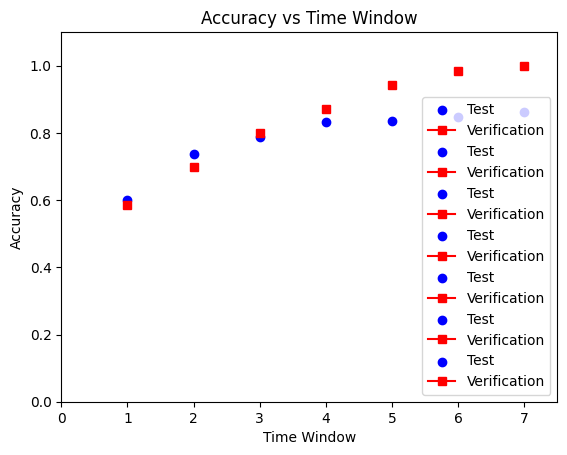

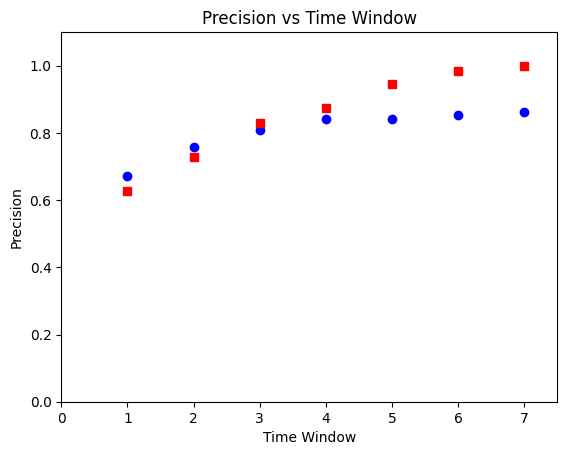

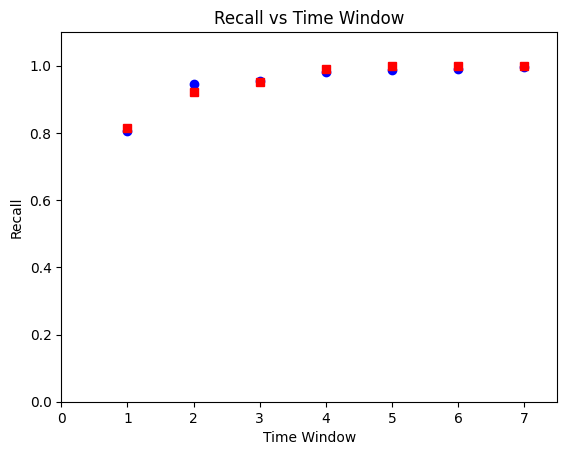

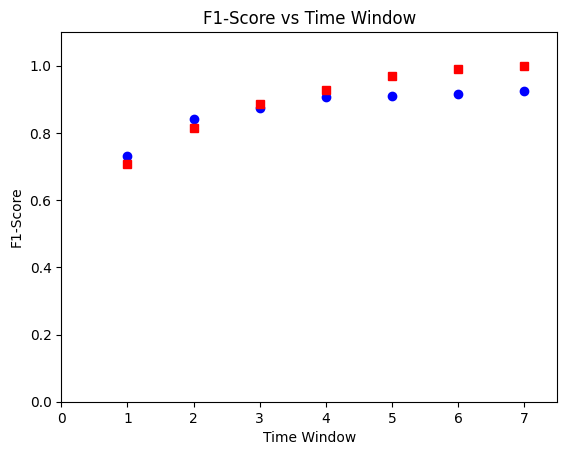

In [963]:
conf_test = []
conf_verify = []

for i in range (1, 8):
    data_old, data_new, labels_old, labels_new = dflb.dataFrameConjunction(dataPreLast, dataPostLast, labelsPreLast, labelsPostLast, i, 3, pattern_data, pattern_new)
    
    training_x, testing_x, training_y, testing_y = train_test_split(data_old, labels_old, test_size=0.2, shuffle=False)

    acc_t, pre_t, re_t, f1_t, acc_v, pre_v, re_v, f1_v, c_t, c_v = pm.RFModel(training_x, training_y, testing_x, testing_y, data_new, labels_new)

    conf_test.append(c_t)
    conf_verify.append(c_v)

    doPlot(acc_t, pre_t, re_t, f1_t, acc_v, pre_v, re_v, f1_v, i)

plt.show()


In [964]:
for i in range(len(conf_test)):
    print(f"test {i+1}\n", conf_test[i])
    print(f"verify {i+1}\n", conf_verify[i])

test 1
 [[ 274 1304]
 [ 643 2667]]
verify 1
 [[ 37 143]
 [ 55 241]]
test 2
 [[ 183 1086]
 [ 202 3417]]
verify 2
 [[ 17 117]
 [ 27 315]]
test 3
 [[ 184  870]
 [ 171 3663]]
verify 3
 [[ 11  76]
 [ 19 370]]
test 4
 [[ 186  739]
 [  73 3890]]
verify 4
 [[ 10  58]
 [  4 404]]
test 5
 [[  90  749]
 [  55 3994]]
verify 5
 [[  8  26]
 [  1 441]]
test 6
 [[  64  707]
 [  39 4078]]
verify 6
 [[  8   7]
 [  1 460]]
test 7
 [[  44  664]
 [  16 4164]]
verify 7
 [[  8   1]
 [  0 467]]


### Regressor attempt

In [965]:
set1 = set(pattern_data['Equipment'].tolist())
set2 = set(pattern_new['Equipment'].tolist())
combined = set1.union(set2)

dataPreLast = pd.DataFrame(columns=combined)
for label in dataPreLast:
    dataPreLast[label] = [0]*pattern_data.shape[0]
labelsPreLast = pd.DataFrame()
labelsPreLast['Label'] = [-1.0]*pattern_data.shape[0]

dataPostLast = pd.DataFrame(columns=combined)
for label in dataPostLast:
    dataPostLast[label] = [0]*pattern_new.shape[0]
labelsPostLast = pd.DataFrame()
labelsPostLast['Label'] = [-1.0]*pattern_new.shape[0]

### Regression labels

In [966]:
def dataFrameConjunctionReg(df1, df2, lb1, lb2, equipment_window, time_window):
    twindow = pd.Timedelta(days=time_window)
    ewindow = pd.Timedelta(days=equipment_window)
    for i in range(pattern_data.shape[0]):
        timenow = pattern_data.iloc[i]['FaultDateTime']
        temp = 0
        for j in range(i, pattern_data.shape[0]):
            temp = j
            if pattern_data.iloc[j]['FaultDateTime'] - timenow > ewindow:
                break
            inner_eq = pattern_data.iloc[j]['Equipment']
            df1[inner_eq][i] += 1
        cur_dt = pattern_data.iloc[temp]['FaultDateTime']
        for j in range(temp, pattern_data.shape[0]):
            inner_eq = pattern_data.iloc[j]['Equipment']
            inner_dt = pattern_data.iloc[j]['FaultDateTime']
            if inner_eq == 'ion source':
                lb1.iloc[i]['Label'] = float((inner_dt - cur_dt).total_seconds()/60/60)
                break
            if (inner_dt - cur_dt) >= twindow:
                lb1.iloc[i]['Label'] = 24*time_window
                break

    for i in range(pattern_new.shape[0]):
        timenow = pattern_new.iloc[i]['FaultDateTime']
        temp = 0
        for j in range(i, pattern_new.shape[0]):
            temp = j
            if pattern_new.iloc[j]['FaultDateTime'] - timenow > ewindow:
                break
            inner_eq = pattern_new.iloc[j]['Equipment']
            df2[inner_eq][i] += 1
        cur_dt = pattern_new.iloc[temp]['FaultDateTime']
        for j in range(temp, pattern_new.shape[0]):
            inner_eq = pattern_new.iloc[j]['Equipment']
            inner_dt = pattern_new.iloc[j]['FaultDateTime']
            if inner_eq == 'ion source':
                lb2.iloc[i]['Label'] = float((inner_dt-cur_dt).total_seconds()/60/60)
                break
            if (inner_dt - cur_dt) >= twindow:
                lb2.iloc[i]['Label'] = 24*time_window
                break
    return df1, df2, lb1, lb2

In [967]:
def RFModel(train_x, train_y, test_x, test_y, verify_x, verify_y):
    rf = RandomForestRegressor()

    rf.fit(train_x, train_y['Label'])
    rf_pred = rf.predict(test_x)

    mae_test = mean_absolute_error(test_y['Label'], rf_pred)
    mse_test = mean_squared_error(test_y['Label'], rf_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(test_y['Label'], rf_pred)

    rf_pred_new = rf.predict(verify_x)

    mae_verify = mean_absolute_error(verify_y['Label'], rf_pred_new)
    mse_verify = mean_squared_error(verify_y['Label'], rf_pred_new)
    rmse_verify = np.sqrt(mse_verify)
    r2_verify = r2_score(verify_y['Label'], rf_pred_new)

    return  mae_test, mse_test, rmse_test, r2_test, mae_verify, mse_verify, rmse_verify, r2_verify

In [968]:
data_old_reg, data_new_reg, labels_old_reg, labels_new_reg = dataFrameConjunctionReg(dataPreLast, dataPostLast, labelsPreLast, labelsPostLast, 3, 3)
training_x, testing_x, training_y, testing_y = train_test_split(data_old_reg, labels_old_reg, test_size=0.2, shuffle=False)
mae_t, mse_t, rmse_t, r2_t, mae_v, mse_v, rmse_v, r2_v = RFModel(training_x, training_y, testing_x, testing_y, data_new_reg, labels_new_reg)